Let consider that bounds between BP can be of 2 types :
* straight with energy $E_0$
* bent with energy $E_1$

There for the total number of BP inside the capsule will be $n = n_0 + n_1$
and the energy $E = n_0 \varepsilon_0  + n_1 \varepsilon_1 = \Delta \varepsilon n_1 +\varepsilon_0 n$ 

let suppose that the length span by the polymer take the form $\left ( \frac{n_1}{n} \right )^{\alpha}$. In the case we are intressted in we will suppose that this length is equal to $d$ the diameter of the capsule. There for we have to account for the constrain $ \left ( \frac{n_1}{n} \right )^{\alpha} - d = 0  $

In order to properly determine a free energy we need to compute the entropy of configuration. We will account for an excluded volume interaction (self-avoidance) in a "mean-field" way. After pulling inside the capsule $k$ monomer the fraction $k\frac{v}{V}$ won't be aviable anymore.

There for after pulling $k+1$ monomers the number of possibilities will be :
* $1 - k\frac{v}{V}$ for the straight bounds
* $(q-2)(1 - k\frac{v}{V})$ for bent bounds (with q=6 in 3D)

The total number $\mathcal{N}$ of walks will be :

$\begin{aligned} \mathcal{N} &=q(q-2)^{n_1}\left(1-\frac{v}{V}\right)\left(1-2 \frac{v}{V}\right) \cdots\left[1-(n-1) \frac{v}{V}\right]=\\ &=q(q-2)^{n_1} \prod_{k=1}^{n-1}\left(1-k \frac{v}{V}\right)=\\ &=q(q-2)^{n_1} \chi \end{aligned}$

$\begin{aligned} \chi &=\prod_{i=1}^{n-1}\left(1-k \frac{v}{V}\right)=\left(\frac{v}{V}\right)^{n-1} \prod_{k=1}^{n-1}\left(\frac{V}{v}-k\right)=\\ &=\left(\frac{v}{V}\right)^{n} \prod_{k=0}^{n-1}\left(\frac{V}{v}-k\right)=\left(\frac{v}{V}\right)^{n} \frac{\left(\frac{V}{v}\right) !}{\left(\frac{V}{v}-n\right) !} \end{aligned}$

using stirling we find $\ln \chi = -n+\left(\frac{V}{v}-n\right)\left[\ln \frac{V}{v}-\ln \left(\frac{V}{v}-n\right)\right]$



The expression for the free energy is then :

$F = \Delta \varepsilon n_1 +\varepsilon_0 n - K_B T \left ( \ln q + n_1\ln (q-2)         -n+\left(\frac{V}{v}-n\right)\left[\ln \frac{V}{v}-\ln \left(\frac{V}{v}-n\right)\right] \right) + \lambda \left ( \left ( \frac{n_1}{n} \right )^{\alpha} - d  \right ) $

where we have accounted for the constrain

now let suppose we are at equilibrium :

$0=\frac{\partial F}{\partial n} = \varepsilon_0  - K_B T \left ( -1- \left[\ln \frac{V}{v}-\ln \left(\frac{V}{v}-n\right)\right] -\frac{n}{\frac{V}{v}-n}\right) -\lambda \alpha n_1^{\alpha} n^{1-\alpha} $

There for

$f \propto n_1 = n^{\frac{\alpha-1}{\alpha}} \left (  \frac{\varepsilon_0}{\lambda \alpha}  - \frac{K_B T}{\lambda \alpha} \left ( -1- \left[\ln \frac{V}{v}-\ln \left(\frac{V}{v}-n\right)\right] -\frac{n}{\frac{V}{v}-n}\right)  \right )^{\frac{1}{\alpha}}$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [6]:
x = np.array([30.37292789969,31.99187600139,33.6108241031,
              35.22977220481,36.84872030651,38.46766840822,
              40.65324834552,42.27219644723,43.89114454894,
              45.51009265064,47.12904075235,48.74798885406,50.36693695576,
              51.98588505747,53.60483315918,55.22378126088,
              56.84272936259,58.4616774643,60.080625566,
              61.69957366771,63.31852176942,64.93746987113,
              66.55641797283,68.17536607454,69.79431417625,
              71.41326227795,73.03221037966,74.65115848137,
              76.27010658307,77.88905468478,79.50800278649,
              81.12695088819,82.7458989899,84.36484709161,
              85.98379519331,87.60274329502,89.22169139673,
              90.84063949843,92.45958760014,94.07853570185,
              95.69748380355,97.31643190526,98.93538000697,
              100.5543281087,102.1732762104,103.7922243121])


y = np.array([-0.5429885000496,-0.6086670962625,-0.1817562208784,
              0.01527956776048,0.01527956776048,-0.08323832655894,
              -0.08323832655894,0.1137974620799,0.4093511450382,
              1.033297809061,1.263172895806,1.460208684445,
              1.624405174978,1.952798156042,2.576744820065,
              3.200691484088,3.726120253792,4.842656389412,
              6.057710419352,7.502639536036,8.750532864082,
              9.867068999703,11.27915881828,13.15099881035,
              16.00801774561,18.17541142064,19.94873351839,
              21.49218052939,22.70723455933,24.11932437791,
              25.89264647566,28.15855804501,30.6543447011,
              33.47852433826,36.99232923565,39.84934817091,
              42.11525974026,43.92142113612,45.46486814712,
              46.81127936949,47.92781550511,48.88015515019,
              49.79965549717,50.52212005552,51.34310250818,
              51.9670491722])

In [7]:
R = 20    # capsule radius (nm)
N = 19000    # number of baise-pairs
pi = np.pi
V = 1.3*pi*(R**3) # volume of the capsule
v = 1             # volume of base pair
k = V/v

def model(x,a,b,c) :
    n = N*x/100
    f = n**((a-1)/a) * (b-c*(-1-(np.log(k)-np.log(k-n)) -n/(k-n)))**(1/a)
    return f

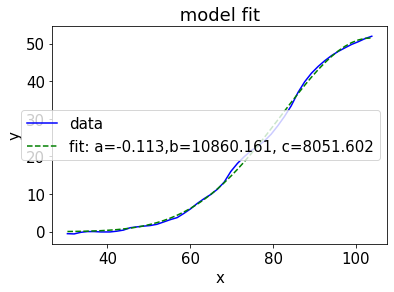

In [8]:
plt.figure(1)
plt.rc('font', size=15)

popt, pcov = curve_fit(model, x,y,maxfev=10000,p0=[-1/5,0,20000])

plt.plot(x, y, 'b-', label='data')
plt.plot(x, model(x, *popt), 'g--',
         label='fit: a=%5.3f,b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.title(' model fit ')
plt.legend()
plt.show()